<a href="https://colab.research.google.com/github/OvsepyanMilena/Milena/blob/main/%D0%9B%D0%B0%D0%B16_%D0%9E%D0%B2%D1%81%D0%B5%D0%BF%D1%8F%D0%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Лабораторная работа 6**
Методы статистического анализа данных. Проверка нормальности данных 

 **Вариант 12**

# **Загрузка и обработка данных**

In [ ]:
#importing the libraries
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
#Importing the data from the webpage into a DataFrame
url='https://en.wikipedia.org/wiki/List_of_highest-grossing_films_in_Singapore'
req=requests.get(url)
data=pd.read_html(req.text)
df=data[3]

In [ ]:
df['Gross']=df['Gross'].str.replace(r"$","").str.replace(r"m","").str.replace(r".","")

In [ ]:
df.head()

,Rank,Title,Studio,Gross,Language
0,1,Spider-Man 2,Sony Pictures,525,English
1,2,Harry Potter and the Prisoner of Azkaban,Warner Bros. Pictures,457,English
2,3,The Incredibles,United International Pictures,367,English
3,4,The Day After Tomorrow,20th Century Fox,313,English
4,5,Kung Fu Hustle,Columbia Pictures,296,Chinese


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Rank      10 non-null     int64 
 1   Title     10 non-null     object
 2   Studio    10 non-null     object
 3   Gross     10 non-null     object
 4   Language  10 non-null     object
dtypes: int64(1), object(4)
memory usage: 528.0+ bytes


In [ ]:
df['Gross']=df["Gross"].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Rank      10 non-null     int64 
 1   Title     10 non-null     object
 2   Studio    10 non-null     object
 3   Gross     10 non-null     int64 
 4   Language  10 non-null     object
dtypes: int64(2), object(3)
memory usage: 528.0+ bytes


In [ ]:
Gross=df['Gross']

# **Тестовый набор данных**

In [ ]:
from numpy import mean
from numpy import std

In [ ]:
print('mean=%.3f std=%.3f' % (mean(Gross), std(Gross)))

mean=326.300 std=91.018


# **Визуальные проверки нормальности**

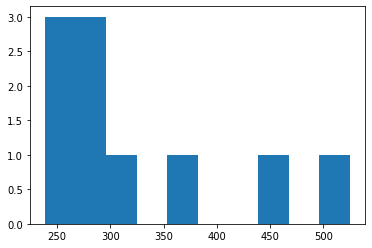

In [ ]:
pyplot.hist(Gross)
pyplot.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


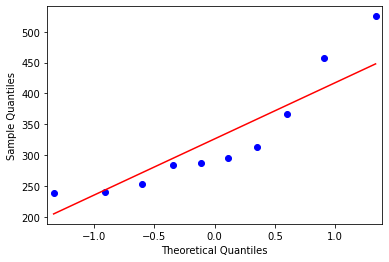

In [ ]:
#QQ plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot

qqplot(Gross, line='s')
pyplot.show()

# **Статистические тесты нормальности данных**

**Тест Шапиро-Вилка**

In [45]:
#Shapiro-Wilk Test
from scipy.stats import shapiro

stat, p = shapiro(Gross)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha=0.05
if p>alpha:
  print('Sample looks Gaussian (fail to reject H0)')
else:
  print('Sample does not Gaussian (reject H0)')

Statistics=0.989, p=0.573
Sample looks Gaussian (fail to reject H0)


**Тест д'Агостино на K ^ 2**

In [46]:
#D'Agostino and Pearson's Test
from scipy.stats import normaltest

stat, p = normaltest(Gross)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha=0.05
if p>alpha:
  print('Sample looks Gaussian (fail to reject H0)')
else:
  print('Sample does not Gaussian (reject H0)')


Statistics=0.912, p=0.634
Sample looks Gaussian (fail to reject H0)


**Тест Андерсона-Дарлинга**

In [52]:
#Anderson-Darling Test
from scipy.stats import anderson

result = anderson(Gross)
print('Statistics: %.3f' % result.statistic)
p=0
for i in range(len(result.critical_values)):
  sl, cv = result.significance_level[i], result.critical_values[i]
  if result.statistic < result.critical_values[i]:
    print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl,cv))
  else:
    print('%.3f: %.3f, data does not look normal (reject H0)' % (sl,cv))


Statistics: 0.363
15.000: 0.555, data looks normal (fail to reject H0)
10.000: 0.632, data looks normal (fail to reject H0)
5.000: 0.759, data looks normal (fail to reject H0)
2.500: 0.885, data looks normal (fail to reject H0)
1.000: 1.053, data looks normal (fail to reject H0)


# **Итог**

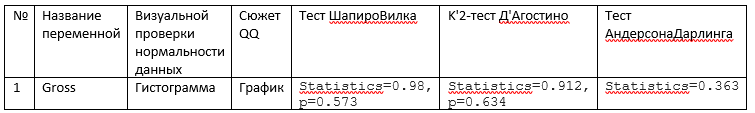